## 내 사진으로 스티커앱 만들기

In [36]:
# 필요한 패키지 import 하기
# 환경 변수, 디렉토리, 파일을 제어할 수 있는 라이브러리
import os
# opencv 라이브러리
import cv2
# 데이터를 도식화 하는 라이브러리
import matplotlib.pyplot as plt
# 다차원 배열 처리 라이브러리
import numpy as np
# 이미지 처리랑 기계 학습, 얼굴인식을 할 수 있는 c++ 라이브러리
import dlib
print("왓!")

왓!


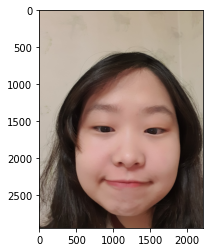

In [37]:
my_image_path = 'aiffel/camera_sticker/images/me1.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

- 내 사진 불러오고 바로 RGB로 색 바꿔서 출력
- 내 얼굴 너무 부담스럽다;;;

In [3]:
# 기본 얼굴 감지기를 불러온다
detector_hog = dlib.get_frontal_face_detector()
# BGR로 되어있는거 RGB로 바꿔서 저장한다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 이미지 파일을 컬러로 가져오고 투명한 부분은 무시한다
dlib_rects = detector_hog(img_rgb, 1)
print("왓!")

왓!


rectangles[[(332, 1068) (1988, 2724)]]


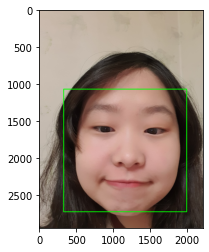

In [229]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

# 찾은 얼굴 영역의 좌표
for dlib_rect in dlib_rects:
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그린다
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

# 색깔 RGB로 바꿔저 출력한다
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 선이 너무 얇은데;;
- cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), **10**, lineType=cv2.LINE_AA) 굵은 글씨 부분 숫자 키우니까 선 굵어진다!!

In [4]:
# landmark 모델의 주소를 model_path 변수에 저장한다
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러온다
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성한다
list_landmarks = []  

# 얼굴 영역 박스 마다 face landmark를 찾아낸다
# face landmark 좌표를 저장한다
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장한다
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장한다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장한다
    list_landmarks.append(list_points)

# 얼굴이 여러개인 경우 list_landmarks는 여러개의 원소를 가진다
# 각 원소는 68개의 랜드마크 위치가 나열된 list 이다
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생 ??
# 위에 말은 얼굴이 하나이니 원소가 1개이다 이건가. 얼굴이 여러개면 맞게 숫자를 늘리면 되겠네
print(len(list_landmarks[0]))

68


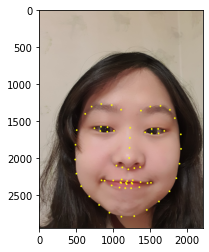

In [5]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행된다
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수이다
        # img_show 이미지 위 각각의 point에 크기가 2이고 (0, 255, 255)색으로 내부가 채워진 원을 그린다
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려진다)
        cv2.circle(img_show, point, 2, (0, 255, 255), 20)

# RGB 이미지로 전환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지를 준비
plt.imshow(img_show_rgb)
# 이미지를 출력
plt.show()

- 점이 너무 작아서 큰 자연수로 해야만 보이네

### 스티커 위치 설정
- 코 30을 중심점으로 하고

In [6]:
# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행한다
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 코의 index는 30 이다
    print (landmark[30])
    # 이미지에서 코 부위의 x값
    x = landmark[30][0]
    # 이미지에서 코 부위의 y값, 일단 코 위치 그대로에 해보자
    y = landmark[30][1]
    # 얼굴 영역의 가로를 차지하는 픽셀의 수
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1214, 1998)
(x,y) : (1214,1998)
(w,h) : (1657,1657)


- 고양이 수염은 코랑 위치가 같으니까 y값도 그대로 쓰자

In [7]:
# 고양이 이미지
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
# 스티커 이미지를 불러온다
img_sticker = cv2.imread(sticker_path)
# 스티커 이미지 조정한다
img_sticker = cv2.resize(img_sticker, (w,h))
# 사이즈를 조정한 고양이 이미지의 차원 확인한다
print (img_sticker.shape)

(1657, 1657, 3)


In [8]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 1214
# y는 이미지에서 코 부위의 y값 = 1998
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 1657
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 1657
refined_x = x - w // 2 # 1214 - (1657/2) = 1214-828.5 = 386
refined_y = y - h // 2 # 1998 - (1657/2) = 1998-828.5 = 1170
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정한다
#이미지 시작점은 top-left 좌표이다
# refined_x, refined_y값에서 고양이 이미지가 시작된다
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (386,1170)


In [215]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지이다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 고양이 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용한다
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지이다
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("왓!")

왓!


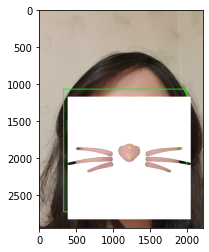

In [216]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 그림이 이상하게 나오는데??

In [9]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지이다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 고양이 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용한다
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지이다
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
print("왓!")

왓!


- img_sticker==0,img_sticker,sticker_area 이 코드는 검은 색은 투명해지고 흰색 바탕이 화면에 보였다
- img_sticker==0은 그대로 두고 sticker_area, img_sticker 이렇게 위치를 바꾸니 잘 나온다

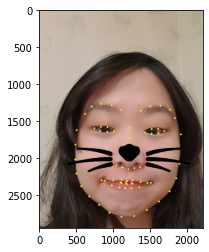

In [10]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

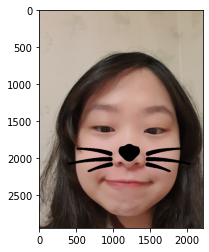

In [11]:
# 고양이 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
# rgb만 적용해놓은 원본 이미지에 고양이 이미지를 덮어 씌운 이미지가 나오게 된다
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 사진을 90도로 돌렸을 때

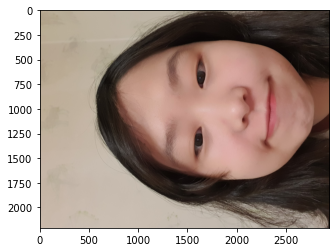

In [12]:
my_image_path = 'aiffel/camera_sticker/images/me1_90.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[]


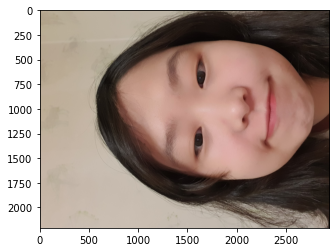

In [14]:
# 기본 얼굴 감지기를 반환
detector_hog = dlib.get_frontal_face_detector()
# cvtColor로 BRG를 RGB로 바꾸었다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# (image, num of image pyramid)
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

# 찾은 얼굴 영역의 좌표
for dlib_rect in dlib_rects:
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 20, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 초록 박스가 없는 것 같은데;;;
- 일단 랜드마크 찍어봅시다

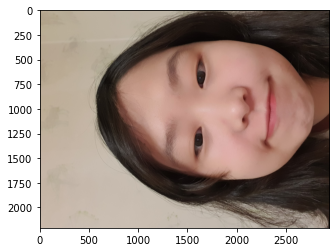

In [16]:
# landmark 모델의 주소를 model_path 변수에 저장한다
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러온다
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성한다
list_landmarks = []  

# 얼굴 영역 박스 마다 face landmark를 찾아낸다
# face landmark 좌표를 저장한다
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장한다
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장한다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장한다
    list_landmarks.append(list_points)

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행된다
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수이다
        # img_show 이미지 위 각각의 point에 크기가 2이고 (0, 255, 255)색으로 내부가 채워진 원을 그린다
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려진다)
        cv2.circle(img_show, point, 2, (0, 255, 255), 20)

# RGB 이미지로 전환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지를 준비
plt.imshow(img_show_rgb)
# 이미지를 출력
plt.show()

- 왜 랜드마크도 안나오지??
- 뭐지??

### 사진을 30도로 돌렸을 때

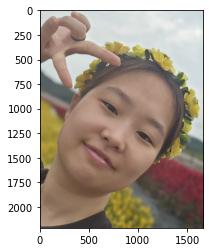

In [47]:
my_image_path = 'aiffel/camera_sticker/images/me30.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(298, 830) (1256, 1789)]]


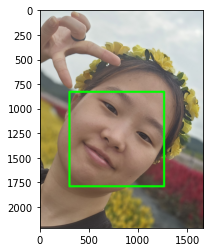

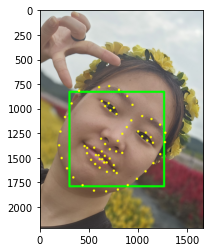

In [48]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 20, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []  

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 20)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 30도 돌린거는 잘 알어보네!
- 랜드마크도 잘 찍힌다

(787, 1328)


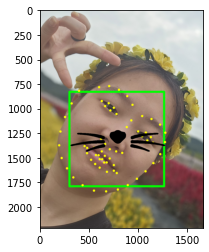

In [49]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 스티커가 따라지 않아서 스티커를 이미지에 맞게 돌려야할 것 같다

### 45도 돌렸을 때

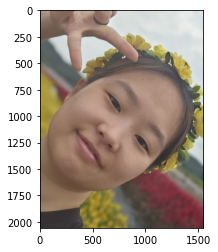

In [24]:
my_image_path = 'aiffel/camera_sticker/images/me45.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[]


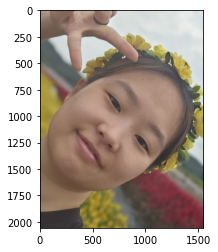

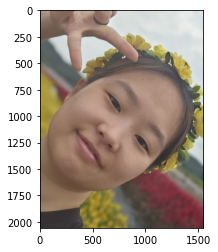

In [25]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 20, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []  

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 20)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 45도부터 초록 박스도 랜드마크도 아무것도 안나온다

### 멀리 있는 이미지

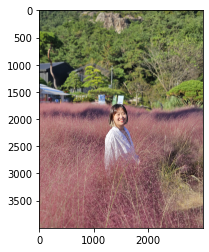

In [41]:
my_image_path = 'aiffel/camera_sticker/images/mef.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(1360, 1836) (1627, 2103)], [(1725, 2926) (1761, 2962)]]


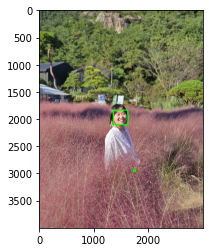

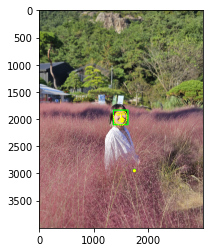

In [42]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 20, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []  

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 20)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 초록 박스랑 랜드마크는 잘 나온다
- 아까 위에서 한거랑 그래도 해봅시다

(1515, 1970)
(1743, 2947)


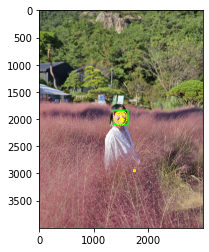

In [45]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print(landmark[33])
        x = landmark[33][0]
        y = landmark[33][1]
        w = h = dlib_rect.width()

        # 2와 14번 위치를 찾는다
        dx = landmark[14][0] - landmark[2][0]
        dy = landmark[14][1] - landmark[2][1]
        angle = -np.degrees(np.arctan2(dy, dx))

        # 스티커 이미지를 불러온다
        sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.resize(img_sticker, (w, h))

        # 스티커 이미지를 돌리고 
        # 정사각형의 형태로 맞춰준다
        img_sticker_rotated = get_largest_bounding_square(img_sticker, angle)

        refined_x = x - img_sticker_rotated.shape[1] // 2
        refined_y = y - img_sticker_rotated.shape[0] // 2

        refined_x = max(0, min(refined_x, img_bgr.shape[1] - img_sticker_rotated.shape[1]))
        refined_y = max(0, min(refined_y, img_bgr.shape[0] - img_sticker_rotated.shape[0]))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

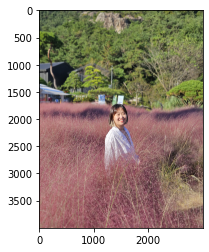

In [46]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 멀리 있는거는 초록 박스랑 랜드마크는 잘 나오는데 스티커가 안나오네?
- 좀 더 확인해봐야할 것 같다